# Assignment3

1. sklearn 패키지를 사용해 로지스틱 회귀모형으로 데이터를 분석해 주세요 
2. 성능지표를 계산하고 이에 대해 해석해 주세요 
   - sklearn : mean accuracy, f1 score 등 다양한 성능지표 계산 
   - confusion matrix : tp, fp, fn, tn 값을 통해 성능지표 계산  
3. 어떤 성능지표를 기준으로 성능을 개선을 시도했고, 그러한 선택의 이유를 적어주세요.
4. **해석을 상세하게 달아주세요 !**

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,accuracy_score,confusion_matrix,recall_score,precision_score
from sklearn.preprocessing import StandardScaler, RobustScaler
import warnings
warnings.filterwarnings(action='ignore')

In [54]:
data = pd.read_csv("assignment3_creditcard.csv")

In [55]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [56]:
columns = data.columns

In [57]:
# 총 데이터 28678개
len(data)

28678

In [58]:
# fraud 값이 1이므로, data['class']의 sum을 구하면 fraud의 갯수임을 알 수 있음
data['Class'].sum()

246

### data preprocessing

In [60]:
# feature, target data split -> 2/3:1/3 = train_ : test_ 비율로 진행
x_train, x_test, y_train, y_test = train_test_split(data.drop('Class',axis=1),data.Class,test_size=0.33,random_state=123)

In [61]:
x_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
14511,-0.693242,1.307364,0.883202,0.094417,1.006947,-0.471342,0.914839,0.115650,-0.938329,-1.253514,...,-1.236827,-0.117785,0.107842,0.287287,-0.306588,-0.123966,0.161687,-0.479456,0.121667,0.137357
27368,0.147405,0.993982,-0.463475,-0.561005,0.916386,-0.779976,0.958372,-0.081944,0.020738,-0.825385,...,-0.185336,0.004524,-0.351396,-0.889152,0.095871,0.461157,-0.418579,0.120298,0.218171,0.082651
15473,-0.553199,1.137216,1.608132,1.422737,0.225375,0.093747,0.627984,-0.107331,1.540804,0.086876,...,0.505154,0.182610,-0.289561,-0.026636,-0.163808,-0.002608,-0.137466,-0.280786,0.345147,0.031041
26774,2.215685,-1.486828,-0.436634,-1.676735,-1.439594,-0.110422,-1.507187,0.080852,-1.244714,1.677778,...,0.143921,-0.381301,-0.352085,-0.623079,0.488874,0.692703,-0.628297,-0.540289,0.028271,-0.036328
26069,1.183099,0.188125,0.499064,1.026740,-0.417335,-0.514016,-0.107038,-0.002267,-0.048959,0.185548,...,-0.196272,-0.149469,0.212872,0.627245,-0.169295,0.349475,0.675490,-0.224806,0.018713,0.011892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,-0.218678,0.608494,0.491205,-0.500529,0.613951,-1.083054,0.880325,-0.245375,-0.164669,-0.537923,...,-0.057613,-0.144440,-0.226639,-0.671591,0.044159,-0.014840,-0.132377,0.193177,-0.219612,-0.015442
17730,0.512745,-2.027530,0.008469,-0.395359,-1.538357,-0.246739,-0.215869,-0.104992,-0.916510,0.650996,...,-0.668012,0.432151,0.047050,-0.399780,-0.420342,0.056205,0.058868,1.088617,-0.131537,0.073895
28030,-0.689643,-3.093436,-1.375866,0.937864,-1.201152,-1.040219,1.835823,-0.683096,-0.307939,-0.573891,...,-0.213863,2.060427,0.585806,-0.642656,-1.007593,0.522675,0.176996,0.959023,-0.308750,0.172784
15725,-2.071050,2.153658,0.529213,-0.479327,-0.930649,-0.827955,-0.462825,1.242180,0.723136,-0.947931,...,-0.295692,-0.027309,-0.198593,-0.401251,0.101922,0.512960,-0.087544,0.236889,0.113365,0.101352


In [62]:
# 일반적인 평균과 분산이 기준인 scaler를 사용하지 않고 중간값과 사분위값을 기준으로 조정하는 robust scaler 사용
# outlier의 영향을 최소화 하기 위해서 -> columns가 가려져있기 때문에 data가 어떠한 의미를 띄고 있는지 모르니 robust scaler 사용
robust_scaler = RobustScaler()
robust_scaler.fit(x_train)
robust_scaler.fit(x_test)
x_train = robust_scaler.transform(x_train)
x_test = robust_scaler.transform(x_test)

In [65]:
x_train = pd.DataFrame(x_train,columns=columns[:-1])
x_test = pd.DataFrame(x_test,columns=columns[:-1])

### model fitting

In [187]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [103]:
# train data로 돌린 logistic regression model의 intercept값과 coefficient값 구함
intercept_ = model.intercept_
coef_ = model.coef_.reshape(28,)

# intercept를 포함한 계수들을 beta로 지정
# beta에 exp()를 적용해서 odds 값 구함
beta_values = np.hstack((intercept_,coef_))
odds_values = np.exp(beta_values).round(3)
label = np.where(beta_values>0,"fraud","not fraud")

# 새로운 table에 해당되는 columns 구축
col_ = columns[:-1].to_list()
col_.insert(0,'constant')

# intercept를 포함한 각 변수의 beta, odds, label의 값을 dataframe형태로 만듬
pd.DataFrame(np.column_stack([beta_values,odds_values,label]),index=col_, columns=['beta','e^beta','label'])

In [126]:
# model의 x_test 값
model.predict_proba(x_test)

array([[9.99977933e-01, 2.20669833e-05],
       [9.99600599e-01, 3.99401079e-04],
       [9.99647178e-01, 3.52821684e-04],
       ...,
       [9.99773326e-01, 2.26673595e-04],
       [9.99324876e-01, 6.75124049e-04],
       [9.99914242e-01, 8.57575389e-05]])

In [149]:
# mean accuracy 단순 임시용 -> imbalance 데이터이기때문에 높게 나올 수 밖에 없음
# 신뢰도 매우 낮음 -> 이 평가 지표로 모델 판단 xxx
model.score(x_test,y_test)

0.9970414201183432

In [151]:
# 모델이 분류하는 예측 값
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### ROC curve

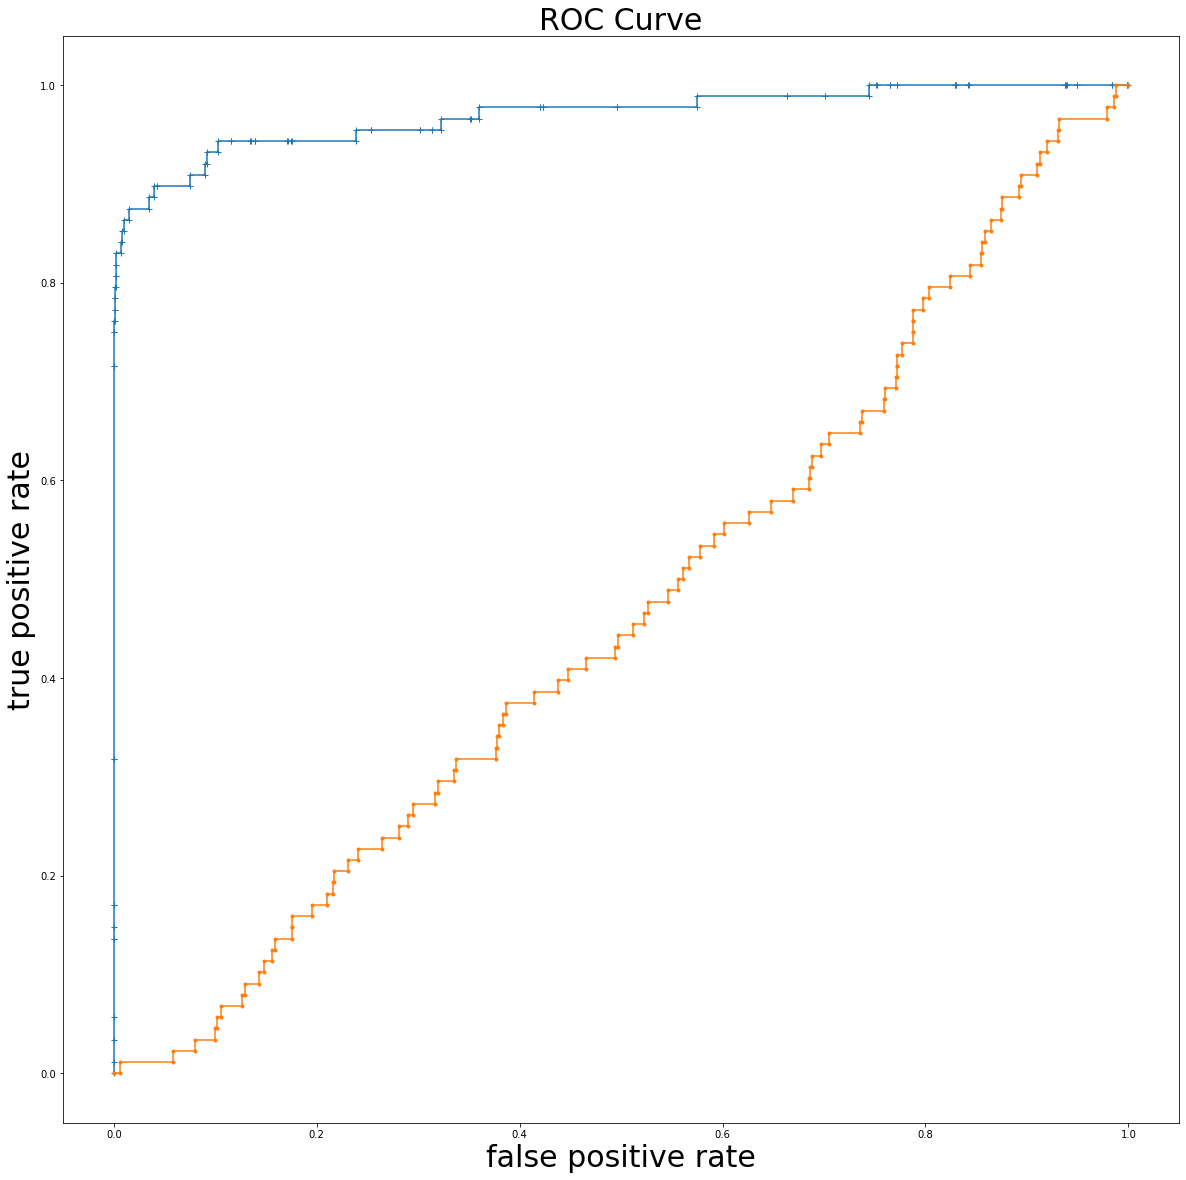

In [145]:
# roc curve 구현
fraud_prob = model.predict_proba(x_test)[:,1]

# model로 구한 fraud 비율에 대한 roc_cruve
fpr, tpr, threshold = roc_curve(y_test,fraud_prob)

# numpy 난수 생성기로 구한 fruad 비율에 대한 roc_curve
r_fpr, r_tpr, r_threshold = roc_curve(y_test,np.random.rand(len(y_test),))

plt.figure(figsize=(20,20))
plt.plot(fpr,tpr,marker='+',label='logistic regression')
plt.plot(r_fpr,r_tpr,marker='.',label='random values')
plt.xlabel('false positive rate',size=30)
plt.ylabel('true positive rate',size=30)
plt.title('ROC Curve',size=30)
plt.show()

### Evaluation

In [148]:
fraud_prob = model.predict_proba(x_test)[:,1]
fraud_prob

array([2.20669833e-05, 3.99401079e-04, 3.52821684e-04, ...,
       2.26673595e-04, 6.75124049e-04, 8.57575389e-05])

In [152]:
# data가 극단적으로 '1'값이 적은 imbalance data 246/28678
# data가 imbalance 데이터이기 때문에, mean_accuracy가 아닌 f1-score로 평가지표 구축
# f1-score = 2*precision*recall/(precision+recall)

def calculate_fscore(precision,recall):
    return 2*precision*recall/(precision+recall)

precision = np.sum(y_test*y_pred==1)/np.sum(y_pred)
recall = np.sum(y_test*y_pred==1)/np.sum(y_test)

calculate_fscore(precision,recall)

0.8250000000000001

In [154]:
# sklearn 패키지와 직접 구현한 f_score 값 비교
from sklearn.metrics import f1_score, confusion_matrix
f1_score(y_pred,y_test)

0.8250000000000001

In [155]:
# confusion matrix TP, TN, FP, FN
confusion_matrix(y_pred,y_test)

array([[9370,   22],
       [   6,   66]], dtype=int64)

### Enhance performance

In [158]:
# OVersampling 기법인 'SMOTE'를 활용하여 imbalance데이터 한계 개선
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
smote_x, smote_y = smote.fit_sample(data.drop('Class',axis=1),data.Class)
print('oversampling이전 데이터 갯수','x:',len(data.drop('Class',axis=1)),'y:',len(data.Class))
print('oversampling이후 데이터 갯수','x:',len(smote_x),'y:',len(smote_y))
print('oversampling이후 데이터 분포','\n',pd.Series(smote_y).value_counts())

oversampling이전 데이터 갯수 x: 28678 y: 28678
oversampling이후 데이터 갯수 x: 56864 y: 56864
oversampling이후 데이터 분포 
 0    28432
1    28432
Name: Class, dtype: int64


In [160]:
# 모델간 비교를 위해 처음 model과 같은 전처리 처리
s_x_train, s_x_test, s_y_train, s_y_test = train_test_split(smote_x,smote_y,test_size=0.33,random_state=123)

robust_scaler.fit(s_x_train)
robust_scaler.fit(s_x_test)
s_x_train = robust_scaler.transform(s_x_train)
s_x_test = robust_scaler.transform(s_x_test)

s_x_train = pd.DataFrame(s_x_train,columns=columns[:-1])
s_x_test = pd.DataFrame(s_x_test,columns=columns[:-1])

In [186]:
new_model = LogisticRegression(solver='liblinear')
new_model.fit(s_x_train,s_y_train)

LogisticRegression(solver='liblinear')

In [188]:
# 위에 처음 model과 같은 과정 반복
intercept_ = new_model.intercept_
coef_ = new_model.coef_.reshape(28,)

beta_values = np.hstack((intercept_,coef_))
odds_values = np.exp(beta_values).round(3)
label = np.where(beta_values>0,"fraud","not fraud")

col_ = columns[:-1].to_list()
col_.insert(0,'constant')

pd.DataFrame(np.column_stack([beta_values,odds_values,label]),index=col_, columns=['beta','e^beta','label'])

,beta,e^beta,label
constant,1.1596845454639104,3.189,fraud
V1,0.6805140025524666,1.975,fraud
V2,-0.7400240354921488,0.477,not fraud
V3,0.7197389902574758,2.054,fraud
V4,5.516928602193014,248.869,fraud
V5,0.43367715971755305,1.543,fraud
V6,-0.3336534858204882,0.716,not fraud
V7,0.9358743556523016,2.549,fraud
V8,-0.43155626537601055,0.649,not fraud
V9,0.2367073259369789,1.267,fraud


In [190]:
new_model.score(s_x_test,s_y_test)

0.9538527123521262

In [191]:
s_y_pred = new_model.predict(s_x_test)
s_y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

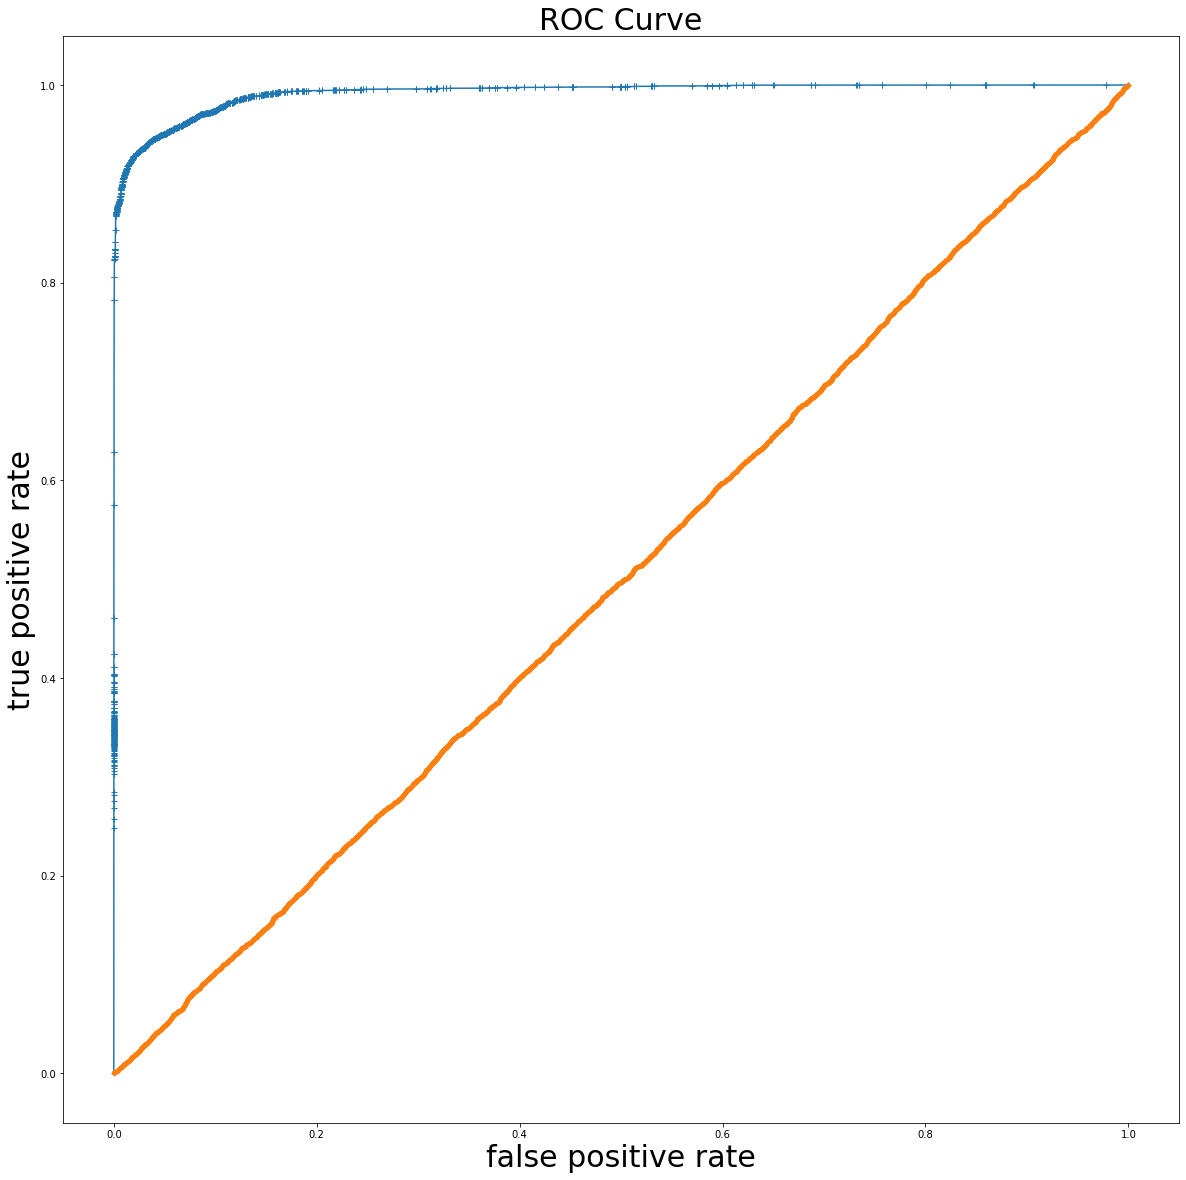

In [192]:
fraud_prob = new_model.predict_proba(s_x_test)[:,1]

fpr, tpr, threshold = roc_curve(s_y_test,fraud_prob)

r_fpr, r_tpr, r_threshold = roc_curve(s_y_test,np.random.rand(len(s_y_test),))

plt.figure(figsize=(20,20))
plt.plot(fpr,tpr,marker='+',label='logistic regression')
plt.plot(r_fpr,r_tpr,marker='.',label='random values')
plt.xlabel('false positive rate',size=30)
plt.ylabel('true positive rate',size=30)
plt.title('ROC Curve',size=30)
plt.show()

# 기존 model f1_score, mean_accuracy: 82.5% , 99%

# new_model f1_score, mean_accuracy: 95.3%, 95%

### 기존의 imbalance dataset에서 SMOTE를 활용해 oversampling하여 비율을 맞추니 f1_score성능이 올라간 반면에, mean accuracy는 감소

In [196]:
# origin model
print(f1_score(y_pred,y_test))
print(model.score(x_test,y_test))

0.8250000000000001
0.9972527472527473


In [195]:
# new model
print(f1_score(s_y_pred,s_y_test))
print(new_model.score(s_x_test,s_y_test))

0.9529654573104498
0.9538527123521262
